<a href="https://colab.research.google.com/github/amrahmani/ML/blob/main/Ch1_DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
np.random.seed(42)

# Create the dataset
customer_id = np.arange(1, 201)
gender = np.random.choice(['Male', 'Female'], size=200)
age = np.random.normal(loc=40, scale=10, size=200).astype(int)
annual_income = np.random.normal(loc=60, scale=15, size=200).astype(int)
spending_score = np.random.randint(1, 101, size=200)

# Create a DataFrame
customers = pd.DataFrame({
    'Customer ID': customer_id,
    'Gender': gender,
    'Age': age,
    'Annual Income (k$)': annual_income,
    'Spending Score (1-100)': spending_score
})

# Introduce missing values for Annual Income (5% of all rows)
num_missing_annual_income = int(0.05 * len(customers))
missing_annual_income_indices = np.random.choice(customers.index, size=num_missing_annual_income, replace=False)
customers.loc[missing_annual_income_indices, 'Annual Income (k$)'] = np.nan

# Introduce missing values for 2% of rows in Gender, Annual Income, and Spending Score
num_missing_rows = int(0.02 * len(customers))
missing_rows_indices = np.random.choice(customers.index, size=num_missing_rows, replace=False)
customers.loc[missing_rows_indices, ['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']] = np.nan

# Display the first few rows of the dataset
print(customers.head())
print(customers.info())
print(customers.describe())
print(customers.isnull().sum())


   Customer ID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0            1    Male   40                62.0                    14.0
1            2  Female   37                50.0                    59.0
2            3    Male   40                61.0                    56.0
3            4    Male   20                54.0                     7.0
4            5    Male   37                61.0                     3.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             200 non-null    int64  
 1   Gender                  196 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      186 non-null    float64
 4   Spending Score (1-100)  196 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB
None
       Customer ID        

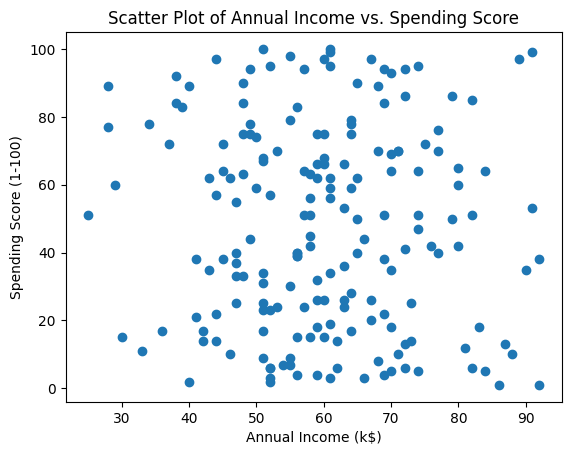

In [5]:
# Scatter plot of Annual Income vs. Spending Score
plt.scatter(customers['Annual Income (k$)'], customers['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.show()


In [10]:
# Identify missing values
missing_values = customers.isnull().sum()
print(missing_values)
print('There are {} rows and {} columns in our dataset.'.format(customers.shape[0],customers.shape[1]))

Customer ID                0
Gender                     4
Age                        0
Annual Income (k$)        14
Spending Score (1-100)     4
dtype: int64
There are 200 rows and 5 columns in our dataset.


In [14]:
# Remove rows with more than 50% missing values
print('There are {} rows and {} columns in our dataset.'.format(customers.shape[0],customers.shape[1]))

customers_cleaned = customers.dropna(thresh=customers.shape[1] * 0.5)

# Display the cleaned dataset
print(customers_cleaned.head())
print('There are {} rows and {} columns in our dataset.'.format(customers_cleaned.shape[0],customers_cleaned.shape[1]))

There are 200 rows and 5 columns in our dataset.
   Customer ID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0            1    Male   40                62.0                    14.0
1            2  Female   37                50.0                    59.0
2            3    Male   40                61.0                    56.0
3            4    Male   20                54.0                     7.0
4            5    Male   37                61.0                     3.0
There are 196 rows and 5 columns in our dataset.


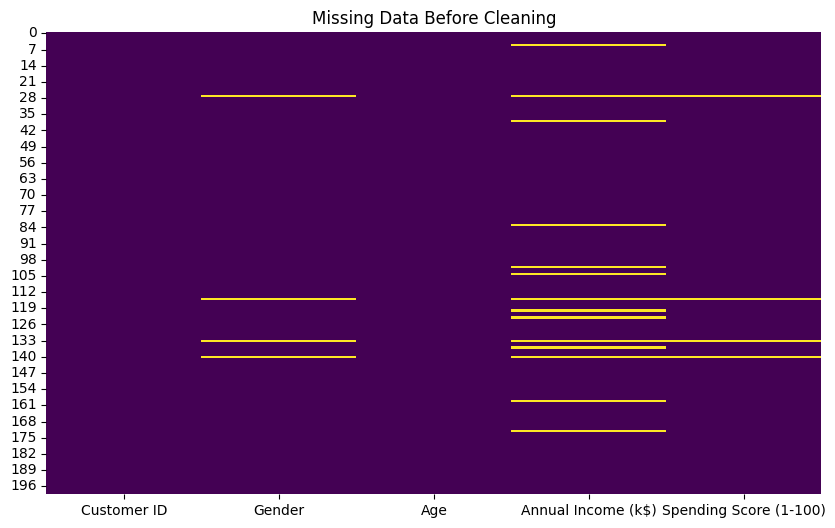

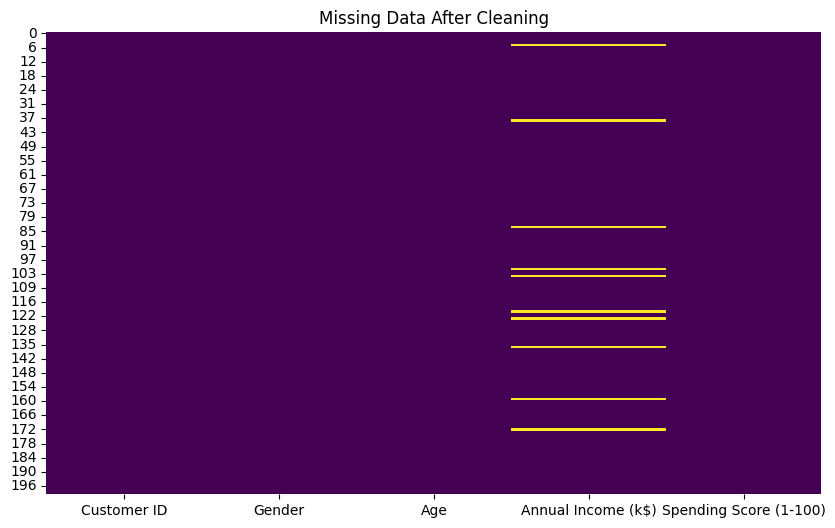

In [9]:
# Visualize missing data before cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(customers.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Before Cleaning')
plt.show()

# Visualize missing data after cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(customers_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data After Cleaning')
plt.show()


In [8]:
# Remove rows with more than 50% missing values
customers_cleaned = customers.dropna(thresh=customers.shape[1] * 0.5)

# Display the cleaned dataset
print(customers_cleaned.head())


   Customer ID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0            1    Male   40                62.0                    14.0
1            2  Female   37                50.0                    59.0
2            3    Male   40                61.0                    56.0
3            4    Male   20                54.0                     7.0
4            5    Male   37                61.0                     3.0


**Create the dataset and download it**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Set the random seed for reproducibility
np.random.seed(42)

# Create the dataset
customer_id = np.arange(1, 201)
gender = np.random.choice(['Male', 'Female'], size=200)
age = np.random.normal(loc=40, scale=10, size=200).astype(int)
annual_income = np.random.normal(loc=60, scale=15, size=200).astype(int)
score = np.random.randint(1, 101, size=200)

# Create a DataFrame
customers = pd.DataFrame({
    'Customer ID': customer_id,
    'Gender': gender,
    'Age': age,
    'Annual Income (k$)': annual_income,
    'Score (1-100)': score
})


# Introduce missing values for Annual Income (5% of rows)
num_missing_annual_income = int(0.05 * len(customers))
missing_indices = np.random.choice(customers.index, num_missing_annual_income, replace=False)
customers.loc[missing_indices, 'Annual Income (k$)'] = np.nan

# Introduce missing values for 2% of rows, keeping only Customer ID and Age
num_missing_rows = int(0.02 * len(customers))
missing_rows_indices = np.random.choice(customers.index, num_missing_rows, replace=False)
customers.loc[missing_rows_indices, ['Gender', 'Annual Income (k$)', 'Score (1-100)']] = np.nan

# Save the dataset to an Excel file
customers.to_excel('customers.xlsx', index=False) # Set index=False to avoid including the index in the Excel file
# Download the created Excel file
files.download('customers.xlsx')
# Display the first few rows of the dataset
print(customers.head(10))
print(customers.info())
print(customers.describe())
print(customers.isnull().sum())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0            1    Male   40                62.0           14.0
1            2  Female   37                50.0           59.0
2            3    Male   40                61.0           56.0
3            4    Male   20                54.0            7.0
4            5    Male   37                61.0            3.0
5            6  Female   43                 NaN           23.0
6            7    Male   54                83.0           18.0
7            8    Male   34                41.0           38.0
8            9    Male   31                91.0           99.0
9           10  Female   34                30.0           15.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         200 non-null    int64  
 1   Gender              196 non-null    object 
 2   Ag

**Step 1: Load the dataset**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
# Replace 'your_correct_url.csv' with the actual URL of your CSV file
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/customers.csv'

# Read the CSV file into a Pandas DataFrame (assuming no header row)
data = pd.read_csv(url, header=None, names=["Customer ID",	"Gender",	"Age",	"Annual Income (k$)",	"Score (1-100)"])  # Adjust header row if needed
print(data) # Display the first few rows of the dataset
print(data.info())
print(data.describe())
print(data.isnull().sum())

     Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0    Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
1              1    Male   40                  62             14
2              2  Female   37                  50             59
3              3    Male   40                  61             56
4              4    Male   20                  54              7
..           ...     ...  ...                 ...            ...
196          196  Female   25                  25             51
197          197  Female   51                  37             72
198          198  Female   40                  80             42
199          199    Male   30                  84             64
200          200    Male   44                  56             15

[201 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ---

**Step 2: Identify Missing Values**


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
0            1    Male   40                62.0           14.0
1            2  Female   37                50.0           59.0
2            3    Male   40                61.0           56.0
3            4    Male   20                54.0            7.0
4            5    Male   37                61.0            3.0
5            6  Female   43                 NaN           23.0
6            7    Male   54                83.0           18.0
7            8    Male   34                41.0           38.0
8            9    Male   31                91.0           99.0
9           10  Female   34                30.0           15.0
Missing values before imputation:
Customer ID            0
Gender                 4
Age                    0
Annual Income (k$)    14
Score (1-100)          4
dtype: int64
Rows with missing values before imputation:
     Customer ID  Gender  Age  Annual Income (k$)  Score (1-100)
5              6  Female  

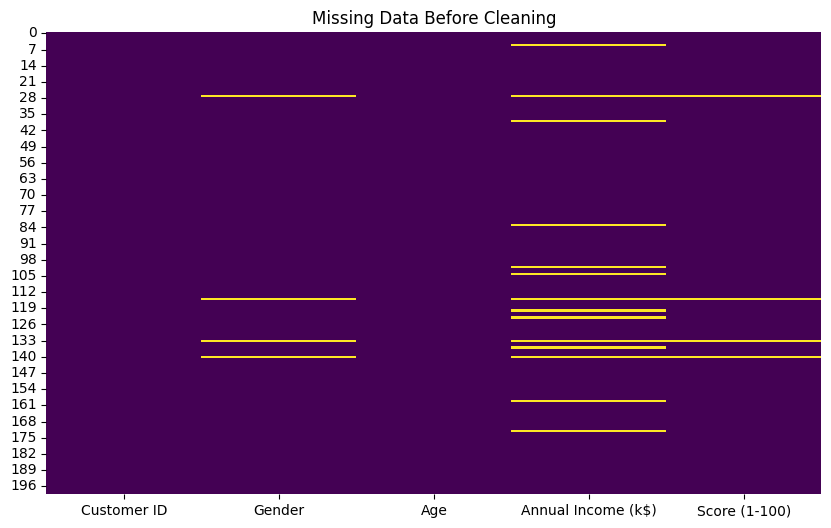

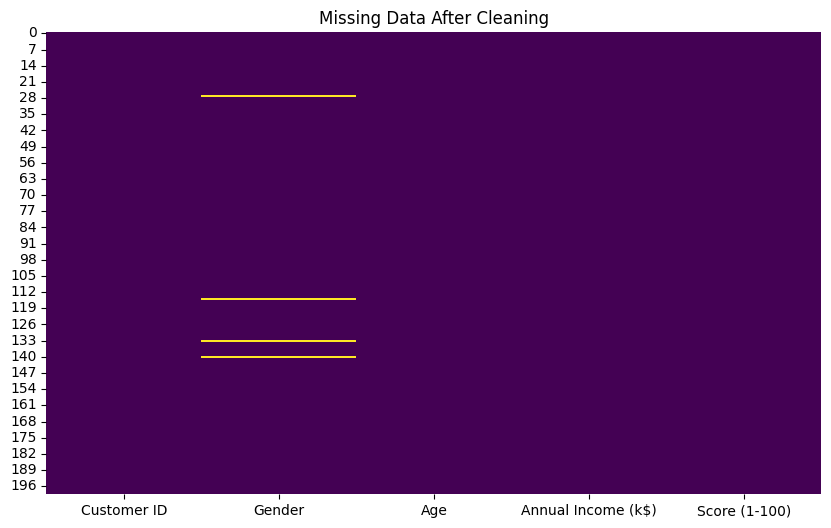

In [16]:
# Identify missing values
missing_values = customers.isnull().sum()
print("Missing values before imputation:")
print(missing_values)

# Impute missing values with the mean value
customers_imputed = customers.copy()
mean_income = customers_imputed['Annual Income (k$)'].mean()
mean_score = customers_imputed['Score (1-100)'].mean()

# Show rows with missing values before imputation
missing_before = customers_imputed[customers_imputed.isnull().any(axis=1)]
print("Rows with missing values before imputation:")
print(missing_before)

# Impute missing values
customers_imputed['Annual Income (k$)'].fillna(mean_income, inplace=True)
customers_imputed['Score (1-100)'].fillna(mean_score, inplace=True)

# Show rows with missing values after imputation
missing_after = customers_imputed[customers_imputed.isnull().any(axis=1)]
print("Rows with missing values after imputation:")
print(missing_after)

# Remove rows with more than 50% missing values
customers_cleaned = customers_imputed.dropna(thresh=customers.shape[1] * 0.5)

# Show rows affected by removal
removed_rows = customers_imputed[~customers_imputed.index.isin(customers_cleaned.index)]
print("Rows removed due to high percentage of missing values:")
print(removed_rows)

# Save the cleaned dataset to an Excel file
customers_cleaned.to_excel('customers_cleaned.xlsx', index=False)

# Visualize missing data before cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(customers.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Before Cleaning')
plt.show()

# Visualize missing data after cleaning
plt.figure(figsize=(10, 6))
sns.heatmap(customers_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data After Cleaning')
plt.show()


**Problem 1: Handling Missing Values**

Task: Clean a dataset by handling missing values.

Dataset: Use a dataset with missing values in various columns, such as a dataset containing information about houses (e.g., price, square footage, number of bedrooms, and year built).

Steps: Identify Missing Values: Load the dataset and identify which columns contain missing values and how many missing values each column has. Impute Missing Values: Impute missing values in numerical columns using the mean or median and categorical columns using the mode. Remove Rows/Columns: Remove rows or columns with a high percentage of missing values (e.g., more than 50% missing). Visualize Missing Data: Create visualizations (e.g., heatmap) to show the distribution of missing values before and after cleaning. Save Cleaned Data: Save the cleaned dataset to a new CSV file.

In [1]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
import seaborn as sns  # Import seaborn for data visualization
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load dataset
df = pd.read_csv('house_data.csv')  # Read the dataset from a CSV file into a pandas DataFrame

# Identify missing values
missing_values = df.isnull().sum()  # Calculate the number of missing values in each column
print(missing_values)  # Print the count of missing values for each column

# Impute missing values
df['price'].fillna(df['price'].median(), inplace=True)  # Replace missing values in the 'price' column with the median value
df['bedrooms'].fillna(df['bedrooms'].mode()[0], inplace=True)  # Replace missing values in the 'bedrooms' column with the most frequent value (mode)

# Remove columns with more than 50% missing values
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)  # Drop columns that have more than 50% missing values

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False)  # Create a heatmap to visualize the missing values in the dataset
plt.show()  # Display the heatmap

# Save cleaned data
df.to_csv('cleaned_house_data.csv', index=False)  # Save the cleaned dataset to a new CSV file


FileNotFoundError: [Errno 2] No such file or directory: 'house_data.csv'

In [2]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Import StandardScaler and MinMaxScaler for feature scaling
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Load dataset
df = pd.read_csv('iris.csv')  # Read the Iris dataset from a CSV file into a pandas DataFrame

# Identify numerical columns
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']  # List the names of numerical columns in the dataset

# Standard scaling
scaler = StandardScaler()  # Create an instance of StandardScaler
df_standard_scaled = df.copy()  # Create a copy of the original DataFrame
df_standard_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])  # Apply standard scaling to the numerical columns

# Min-max scaling
scaler = MinMaxScaler()  # Create an instance of MinMaxScaler
df_minmax_scaled = df.copy()  # Create a copy of the original DataFrame
df_minmax_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])  # Apply min-max scaling to the numerical columns

# Compare distributions
for col in numerical_cols:  # Iterate over each numerical column
    plt.figure(figsize=(12, 4))  # Create a new figure with a specific size
    plt.subplot(1, 3, 1)  # Add a subplot in a 1x3 grid at position 1
    plt.hist(df[col], bins=20, alpha=0.5, label='Original')  # Plot a histogram of the original data
    plt.title(f'{col} - Original')  # Set the title of the subplot
    plt.subplot(1, 3, 2)  # Add a subplot in a 1x3 grid at position 2
    plt.hist(df_standard_scaled[col], bins=20, alpha=0.5, label='Standard Scaled')  # Plot a histogram of the standard scaled data
    plt.title(f'{col} - Standard Scaled')  # Set the title of the subplot
    plt.subplot(1, 3, 3)  # Add a subplot in a 1x3 grid at position 3
    plt.hist(df_minmax_scaled[col], bins=20, alpha=0.5, label='Min-Max Scaled')  # Plot a histogram of the min-max scaled data
    plt.title(f'{col} - Min-Max Scaled')  # Set the title of the subplot
    plt.tight_layout()  # Adjust the layout to prevent overlap
    plt.show()  # Display the plots

# Save scaled data
df_standard_scaled.to_csv('standard_scaled_iris.csv', index=False)  # Save the standard scaled dataset to a new CSV file
df_minmax_scaled.to_csv('minmax_scaled_iris.csv', index=False)  # Save the min-max scaled dataset to a new CSV file

FileNotFoundError: [Errno 2] No such file or directory: 'iris.csv'

In [3]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # Import LabelEncoder and OneHotEncoder for encoding categorical variables

# Load dataset
df = pd.read_csv('customer_data.csv')  # Read the customer data from a CSV file into a pandas DataFrame

# Identify categorical columns
categorical_cols = ['gender', 'occupation']  # List the names of categorical columns in the dataset

# Label encoding
label_encoder = LabelEncoder()  # Create an instance of LabelEncoder
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])  # Apply label encoding to the 'gender' column and store the result in a new column

# One-hot encoding
df = pd.get_dummies(df, columns=['occupation'], drop_first=True)  # Apply one-hot encoding to the 'occupation' column and drop the first category to avoid multicollinearity

# Compare before and after encoding
print(df.head())  # Print the first few rows of the DataFrame to compare the original and encoded data

# Save encoded data
df.to_csv('encoded_customer_data.csv', index=False)  # Save the encoded dataset to a new CSV file


FileNotFoundError: [Errno 2] No such file or directory: 'customer_data.csv'